In a solar panel efficiency study, researchers want to investigate the relationship between the temperature and the efficiency of solar panels. They collected data on the temperature (in Celsius) and the corresponding efficiency (in percentage) of solar panels over a period of time. The dataset contains measurements from 50 different days.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [7]:
df=pd.read_csv('Solar_Panel.csv')
df.head()

,Unnamed: 0,Temperature,Efficiency,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,27.440675,65.188987,NaN,NaN,NaN,NaN
1,1,35.759468,87.633611,NaN,NaN,NaN,NaN
2,2,30.138169,72.520823,NaN,NaN,NaN,NaN
3,3,27.244159,71.431708,NaN,NaN,NaN,NaN
4,4,21.182740,64.327393,NaN,NaN,NaN,NaN


a. Using Simple Linear Regression, can you develop a model to predict the efficiency of solar panels based on the temperature?

In [11]:
# Splitting data into Training and Testing.
X = df[['Temperature']]
y = df['Efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model.predict([[30]]))
print(model.coef_)
print(model.intercept_)

[73.60902356]
[0.45239671]
60.03712219117327


c:\Users\keert\anaconda3\envs\test\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Evaluate the model

In [12]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 3.010819287671694
Mean Squared Error (MSE): 13.912201669525938
Root Mean Squared Error (RMSE): 3.7299063888422106
R-squared: 0.7463233306961112


b. Perform an F-test to determine whether temperature significantly predicts the
efficiency of solar panels.


In [17]:
X_train_with_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Extract F-statistic and p-value
f_value = ols_model.fvalue
f_p_value = ols_model.f_pvalue

print(f"\nF-test Results:")
print(f"F-statistic: {f_value}")
print(f"P-value: {f_p_value}")

# Interpretation
if f_p_value < 0.05:
    print("Temperature significantly predicts the efficiency of solar panels.")
else:
    print("Temperature does not significantly predict the efficiency of solar panels.")


F-test Results:
F-statistic: 62.43952750060243
P-value: 1.5336573594943026e-09
Temperature significantly predicts the efficiency of solar panels.


c. Conduct a t-test to assess the significance of the regression coefficient for
temperature.


In [14]:
# Extract t-statistic and p-value for the individual predictor
t_value = ols_model.tvalues['Temperature']
t_p_value = ols_model.pvalues['Temperature']

print(f"\nT-test Results for Temperature:")
print(f"T-statistic: {t_value}")
print(f"P-value: {t_p_value}")

if t_p_value < 0.05:
    print("Temperature has a significant effect on the efficiency of solar panels (based on the t-test).")
else:
    print("Temperature does not have a significant effect on the efficiency of solar panels (based on the t-test).")


T-test Results for Temperature:
T-statistic: 7.901868608158617
P-value: 1.5336573594942532e-09
Temperature has a significant effect on the efficiency of solar panels (based on the t-test).


Graph for the above normal and tested data

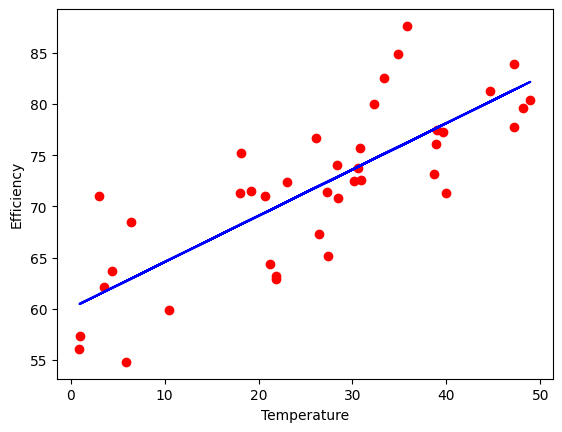

In [15]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.xlabel('Temperature')
plt.ylabel('Efficiency')
plt.show()

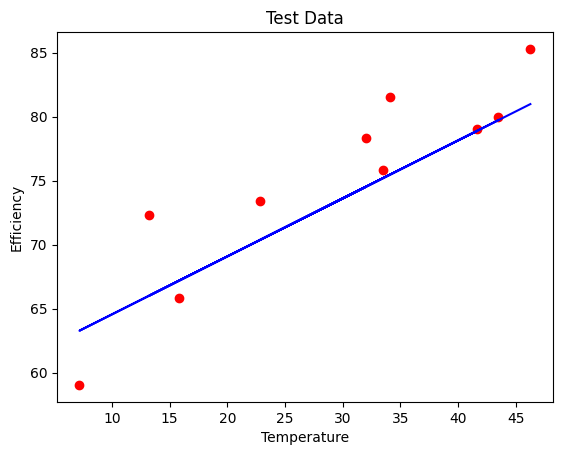

In [16]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.xlabel('Temperature')
plt.ylabel('Efficiency')
plt.title('Test Data')
plt.show()